In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import torch

In [2]:
train_df = pd.read_csv("../input/cassandra-mock-round/train.csv",index_col = "id")
test = pd.read_csv("../input/cassandra-mock-round/test.csv",index_col = "id")
y = train_df['Count']
train = train_df.drop('Count',axis = 1)

In [3]:
train.head(10)

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
id,,,,,,,,,,,,
1,05/08/2018,6:00,300.3,83,5.04,1080,0.00,0.0,0.0,Summer,NO,YES
2,21/01/2018,23:00,272.6,32,2.16,2000,0.00,0.0,0.0,Winter,NO,YES
3,11/05/2018,6:00,285.0,83,1.44,321,0.01,0.0,0.0,Spring,NO,YES
4,05/07/2018,13:00,301.1,67,3.96,1772,1.43,0.0,0.0,Summer,NO,YES
5,02/01/2018,5:00,269.9,67,2.16,1384,0.00,0.0,0.0,Winter,NO,YES
6,09/08/2018,22:00,300.5,82,1.44,1228,0.00,0.0,0.0,Summer,NO,YES
7,15/09/2018,1:00,294.8,79,5.04,2000,0.00,0.0,0.0,Autumn,NO,YES
8,12/06/2018,12:00,297.0,51,6.48,2000,2.29,0.0,0.0,Summer,NO,YES
9,20/09/2018,0:00,293.1,58,1.08,2000,0.00,0.0,0.0,Autumn,NO,YES


In [4]:
test.head(10)

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
id,,,,,,,,,,,,
4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES
4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES
4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES
4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES
4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES
4992,06/10/2018,16:00,294.5,62,12.24,2000,1.26,0.0,0.0,Autumn,NO,YES
4993,02/09/2018,7:00,293.2,65,5.04,2000,0.16,0.0,0.0,Autumn,NO,YES
4994,23/02/2018,23:00,278.5,80,9.72,258,0.00,0.0,0.0,Winter,NO,YES
4995,05/09/2018,9:00,296.4,59,10.80,1974,1.46,0.0,0.0,Autumn,NO,YES


In [5]:
def add_date_features(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['day_of_month'] = df['Date'].dt.days_in_month
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['week'] = df['Date'].dt.isocalendar().week
    df['quarter'] = df['Date'].dt.quarter    
    
    
   
   
    return df

In [6]:
df = pd.concat([test.assign(ind = "test"), train.assign(ind = "train")])

In [7]:
df

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind
id,,,,,,,,,,,,,
4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES,test
4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES,test
4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES,test
4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES,test
4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,21/07/2018,19:00,306.4,51,9.36,2000,0.59,0.0,0.0,Summer,NO,YES,train
4983,19/03/2018,19:00,281.4,51,11.88,1977,0.01,0.0,0.0,Spring,NO,YES,train
4984,03/10/2018,13:00,295.5,40,9.36,1854,2.64,0.0,0.0,Autumn,YES,YES,train


In [8]:
df['Date']= pd.to_datetime(df['Date'])


In [9]:
df_with_date = add_date_features(df).drop('Date',axis = 1)


In [10]:
df_with_date

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,
4987,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES,test,2018,10,6,31,5,40,4
4988,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES,test,2018,1,21,31,6,3,1
4989,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES,test,2017,12,13,31,2,50,4
4990,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES,test,2018,7,3,31,1,27,3
4991,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES,test,2018,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,19:00,306.4,51,9.36,2000,0.59,0.0,0.0,Summer,NO,YES,train,2018,7,21,31,5,29,3
4983,19:00,281.4,51,11.88,1977,0.01,0.0,0.0,Spring,NO,YES,train,2018,3,19,31,0,12,1
4984,13:00,295.5,40,9.36,1854,2.64,0.0,0.0,Autumn,YES,YES,train,2018,3,10,31,5,10,1


In [11]:
object_cols = ['Seasons','Holiday','Working Day','Hour']

In [12]:
from sklearn.preprocessing import OrdinalEncoder
# Make copy to avoid changing original data
label_df = df.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

label_df


,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,,
4987,2018-10-06,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,2018,10,6,31,5,40,4
4988,2018-01-21,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,2018,1,21,31,6,3,1
4989,2017-12-13,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,2017,12,13,31,2,50,4
4990,2018-07-03,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,2018,7,3,31,1,27,3
4991,2018-08-20,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,2018,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,2018-07-21,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,2018,7,21,31,5,29,3
4983,2018-03-19,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,2018,3,19,31,0,12,1
4984,2018-03-10,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,2018,3,10,31,5,10,1


In [13]:
label_df = label_df.drop(['year','Date'],axis = 1)

In [14]:
label_df

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,
4987,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,10,6,31,5,40,4
4988,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,1,21,31,6,3,1
4989,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,12,13,31,2,50,4
4990,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,7,3,31,1,27,3
4991,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,7,21,31,5,29,3
4983,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,3,19,31,0,12,1
4984,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,3,10,31,5,10,1


In [15]:
trainplt = label_df[label_df['ind'].eq('train')]
trainplt

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,
1,20.0,300.3,83,5.04,1080,0.00,0.0,0.0,2.0,0.0,1.0,train,5,8,31,1,19,2
2,15.0,272.6,32,2.16,2000,0.00,0.0,0.0,3.0,0.0,1.0,train,1,21,31,6,3,1
3,20.0,285.0,83,1.44,321,0.01,0.0,0.0,1.0,0.0,1.0,train,11,5,30,0,45,4
4,4.0,301.1,67,3.96,1772,1.43,0.0,0.0,2.0,0.0,1.0,train,5,7,31,0,19,2
5,19.0,269.9,67,2.16,1384,0.00,0.0,0.0,3.0,0.0,1.0,train,2,1,28,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,7,21,31,5,29,3
4983,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,3,19,31,0,12,1
4984,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,3,10,31,5,10,1


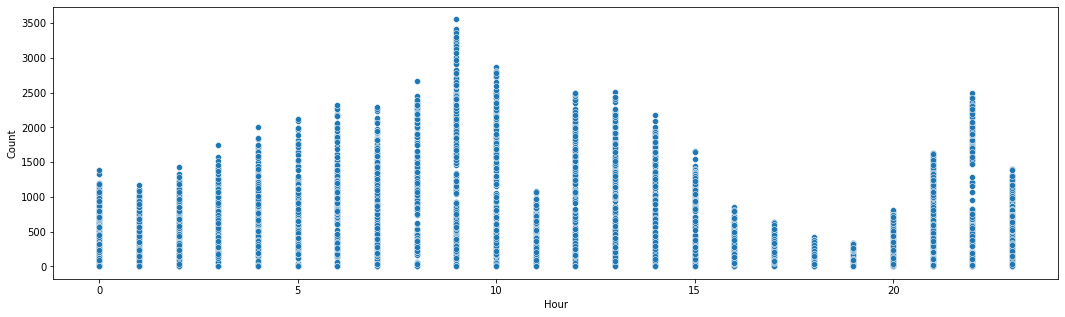

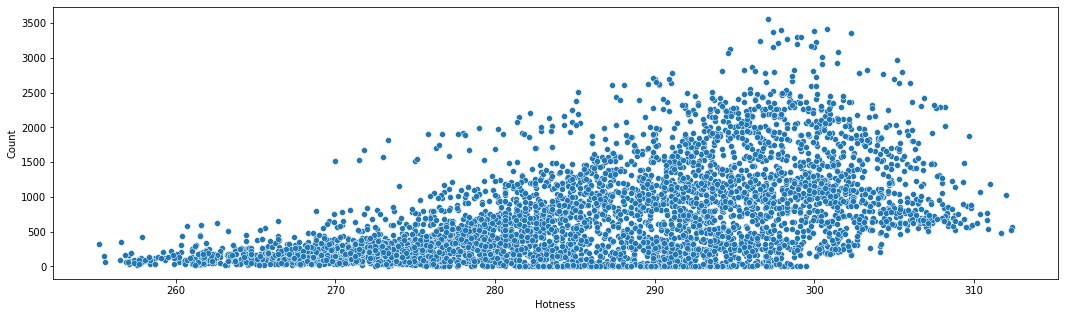

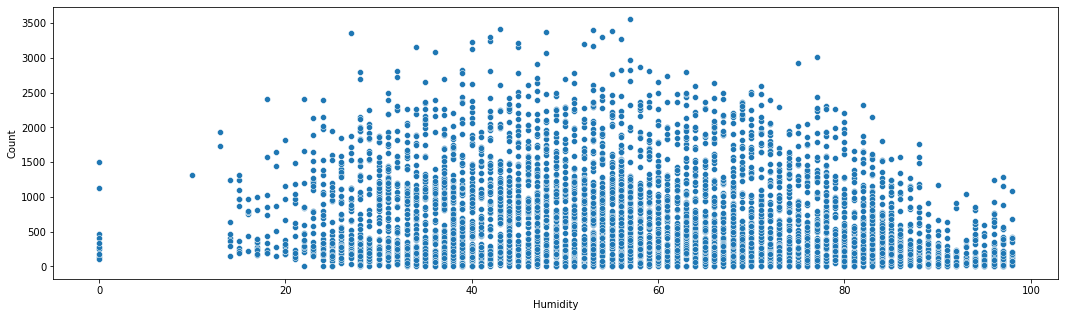

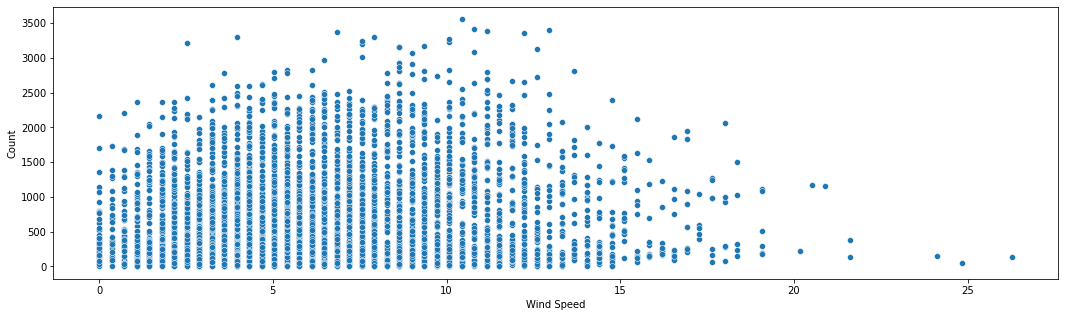

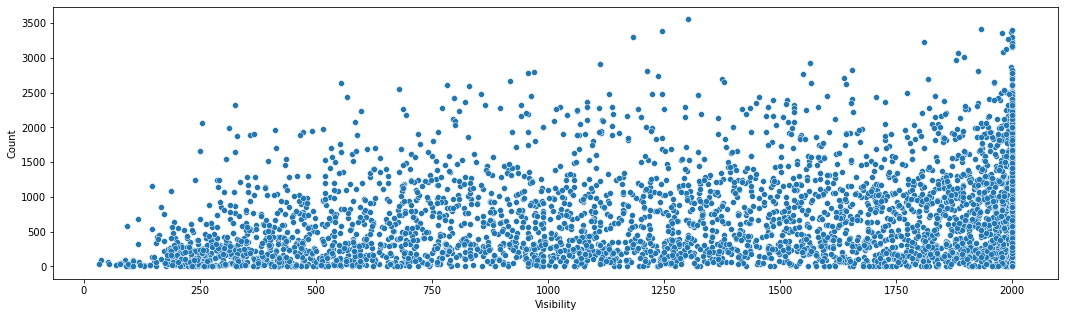

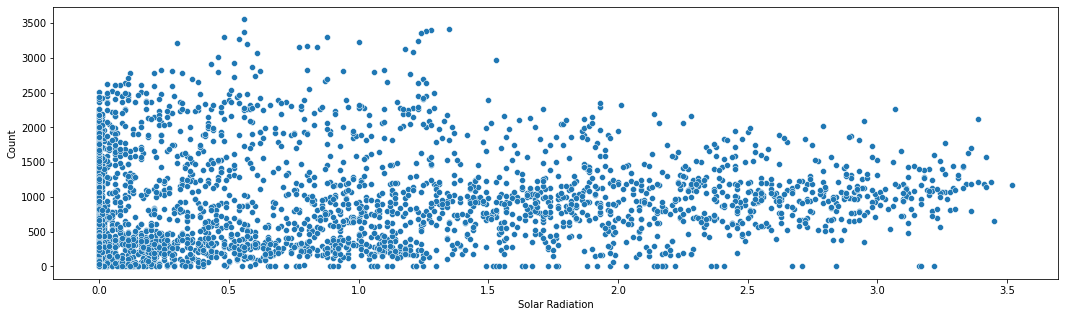

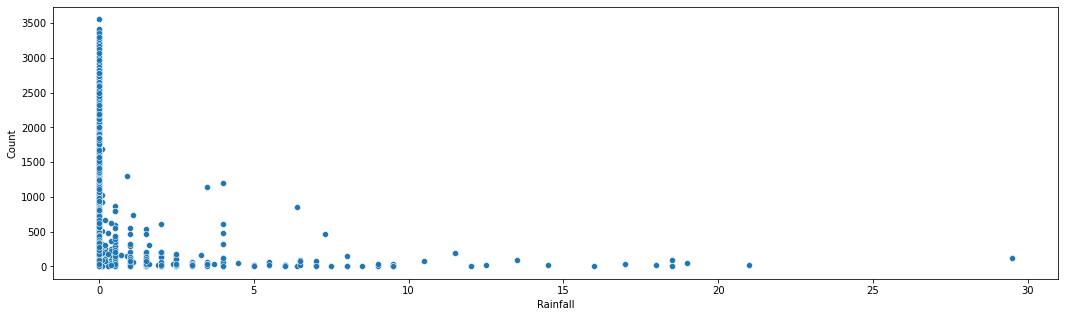

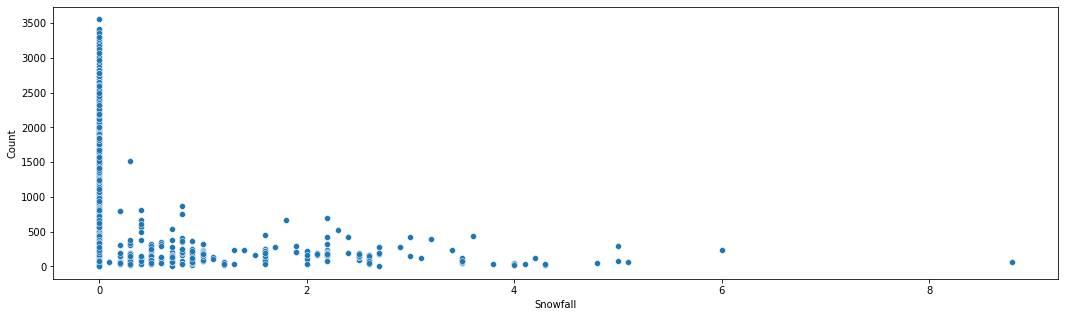

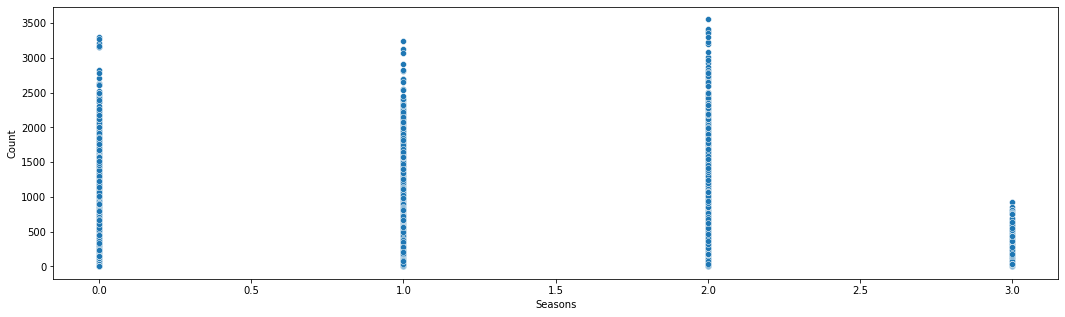

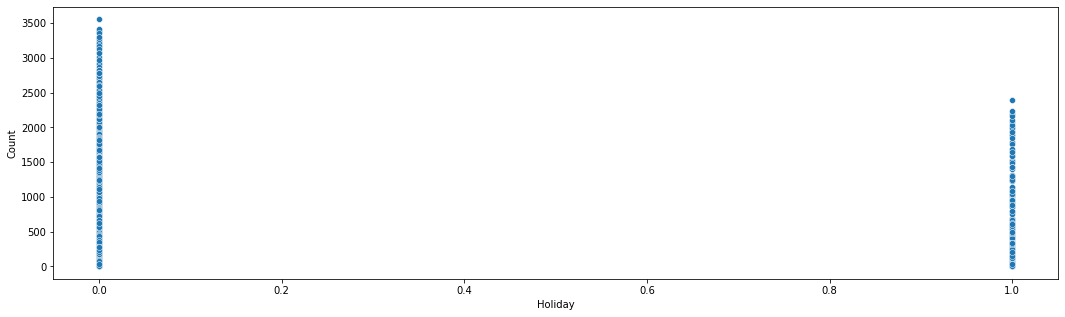

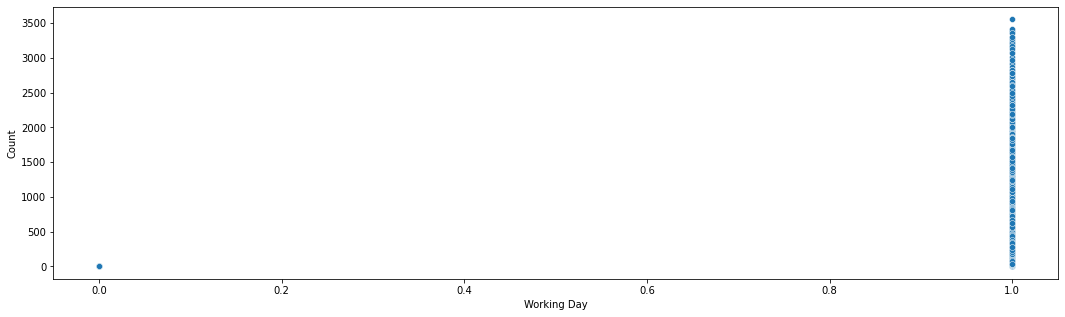

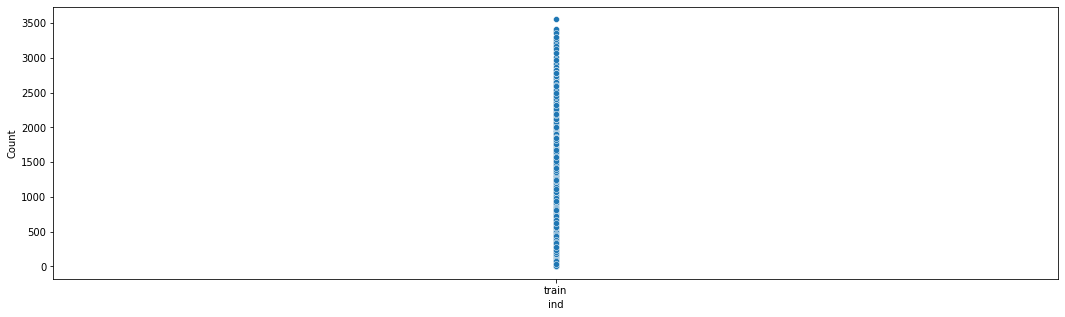

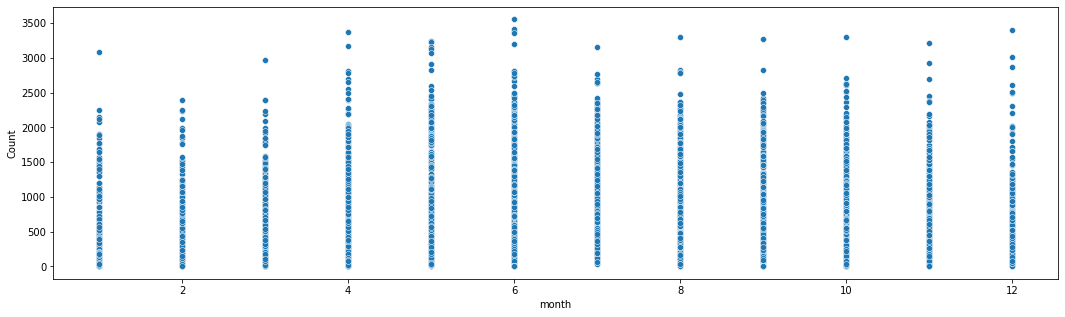

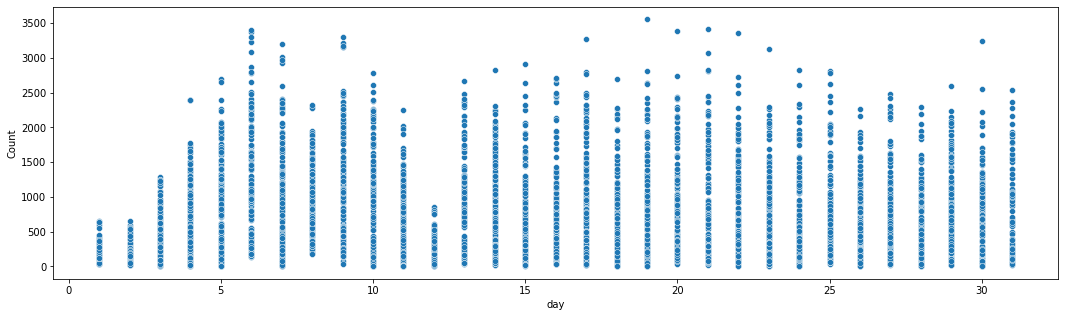

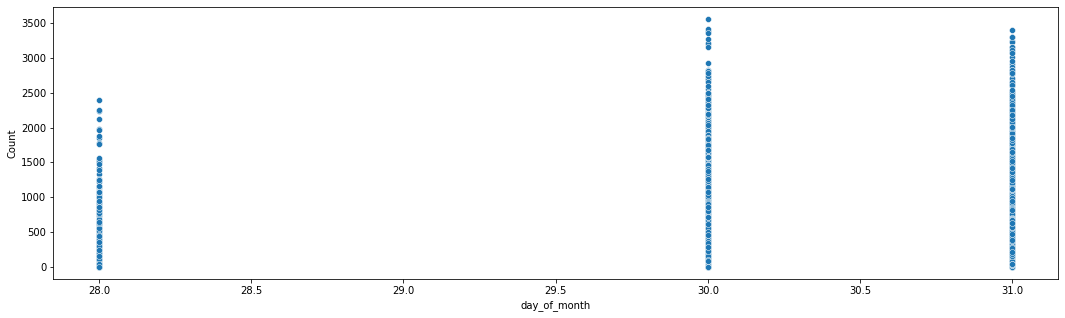

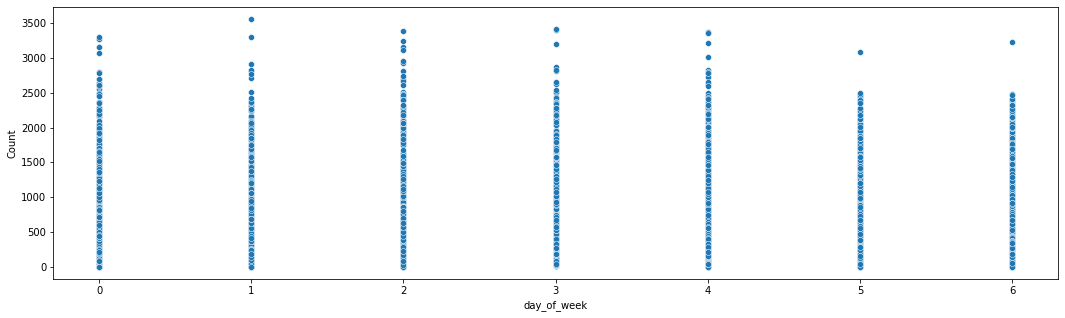

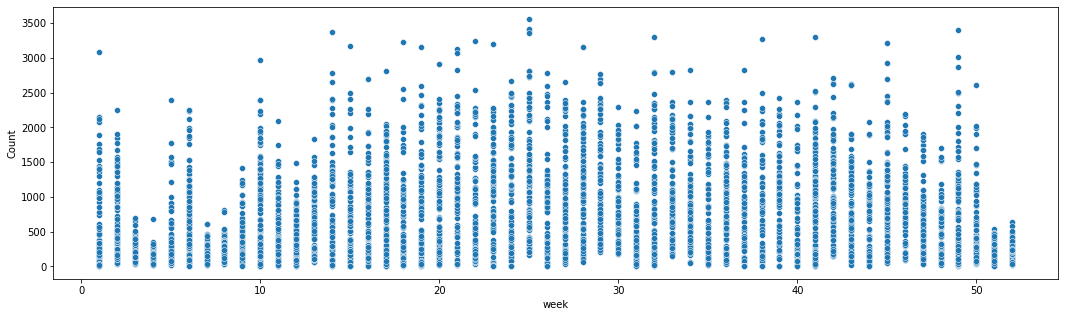

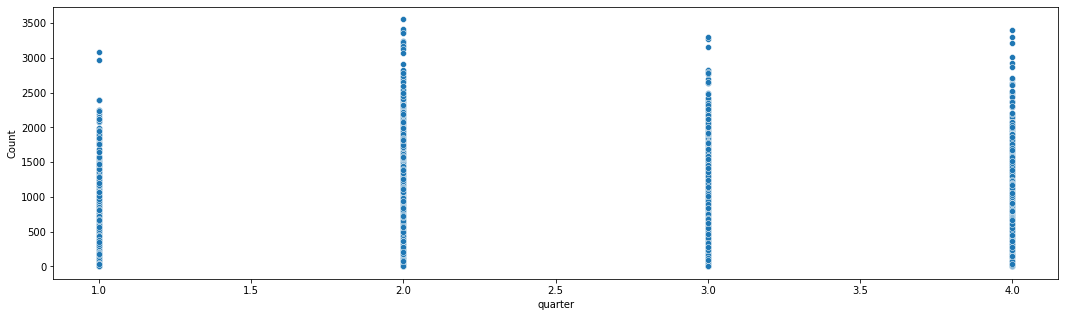

In [16]:
for col in trainplt.columns:
    plt.figure(figsize = (18,5)) 
    sns.scatterplot(x = trainplt[col],y = y)
    

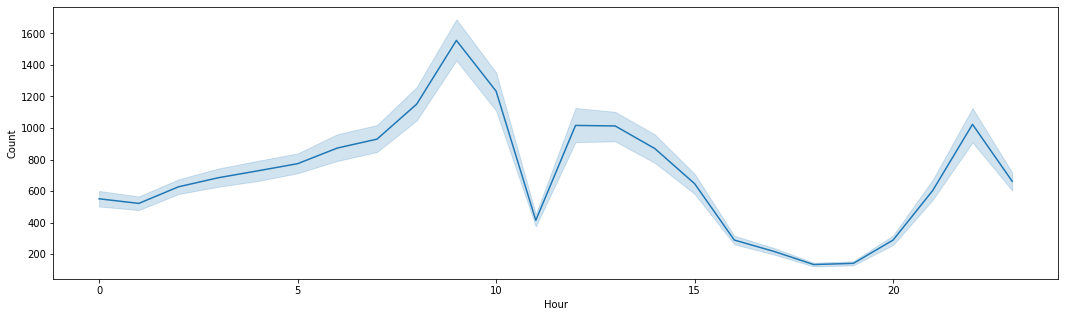

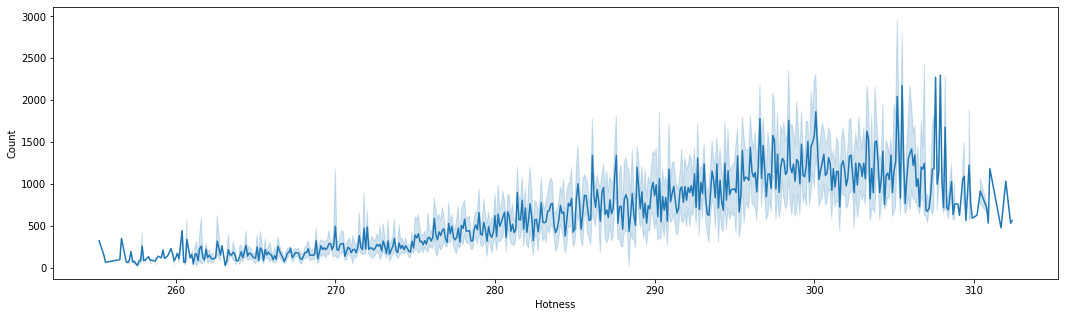

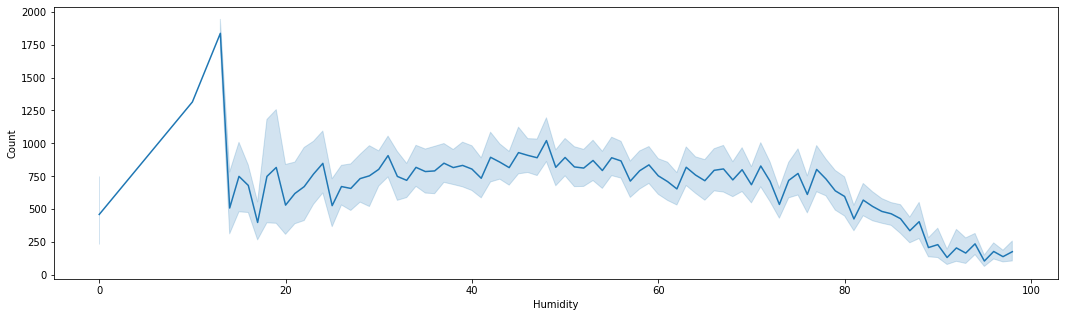

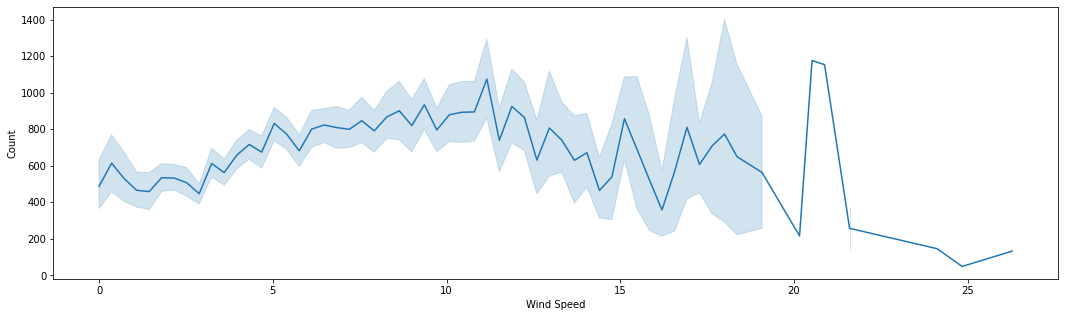

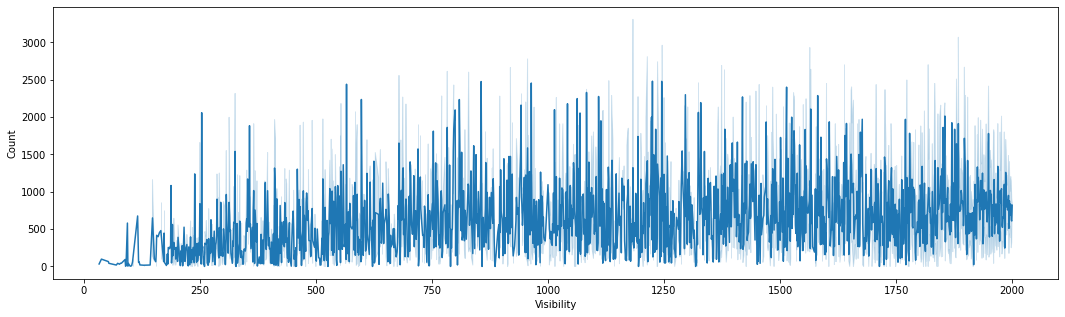

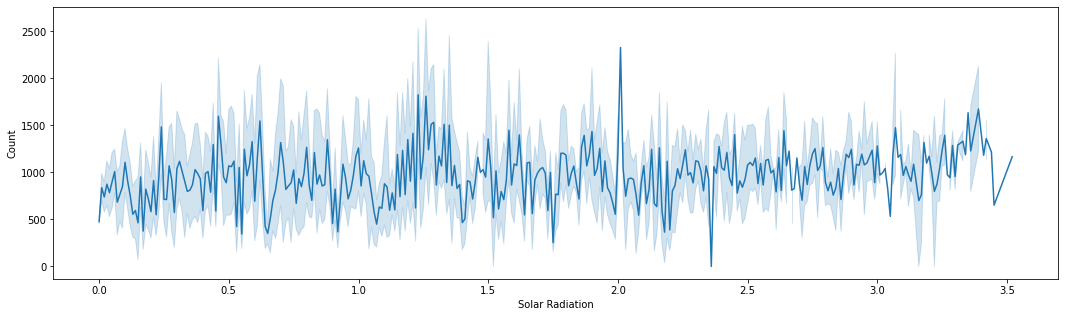

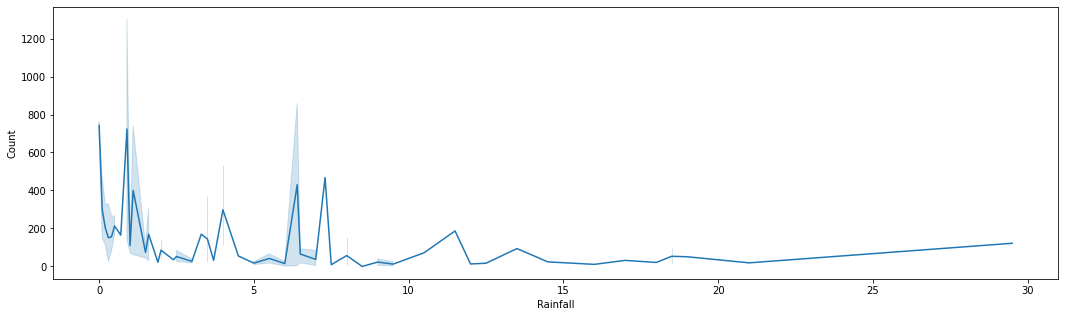

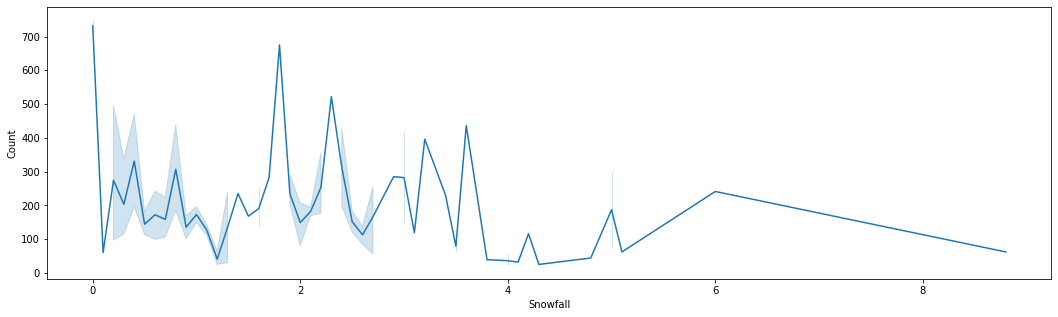

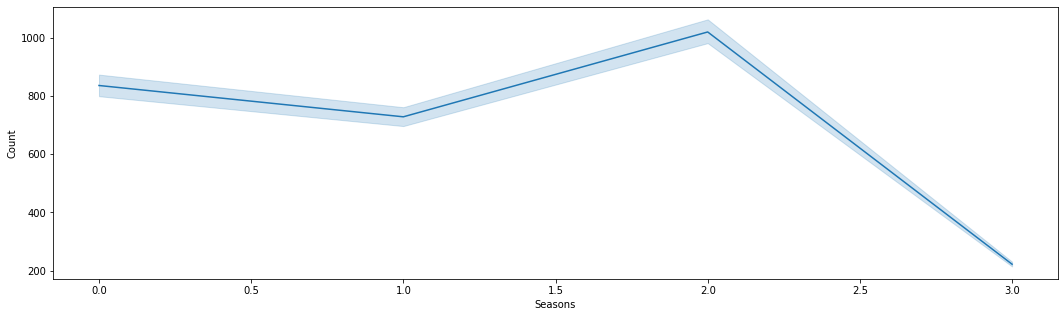

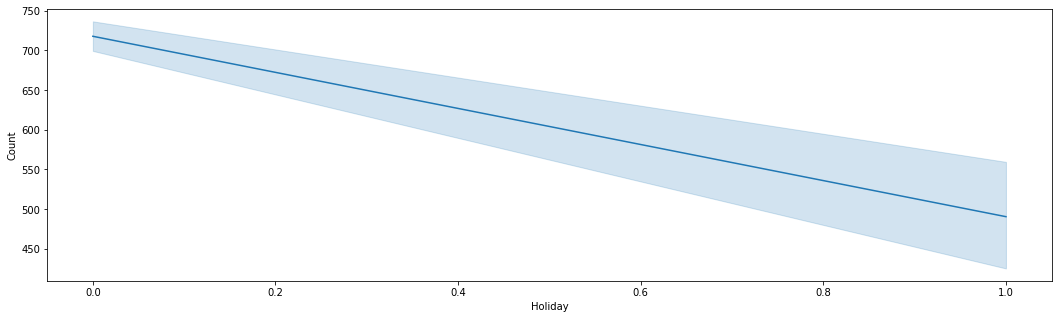

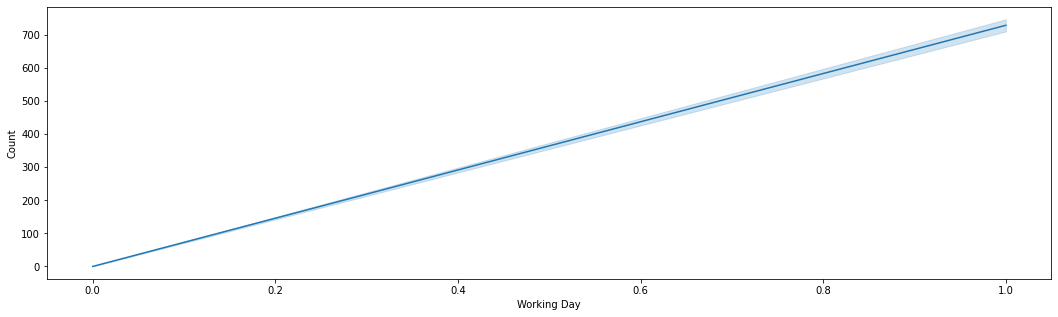

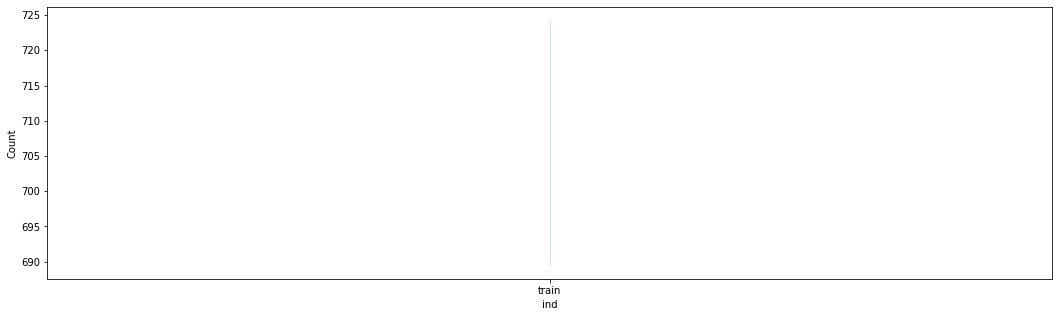

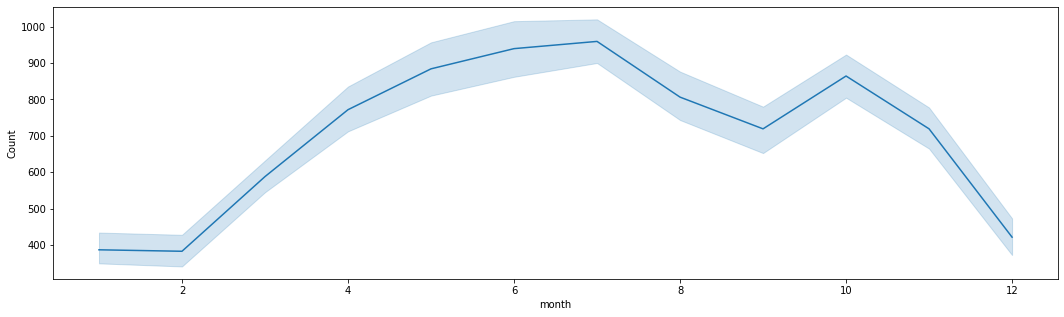

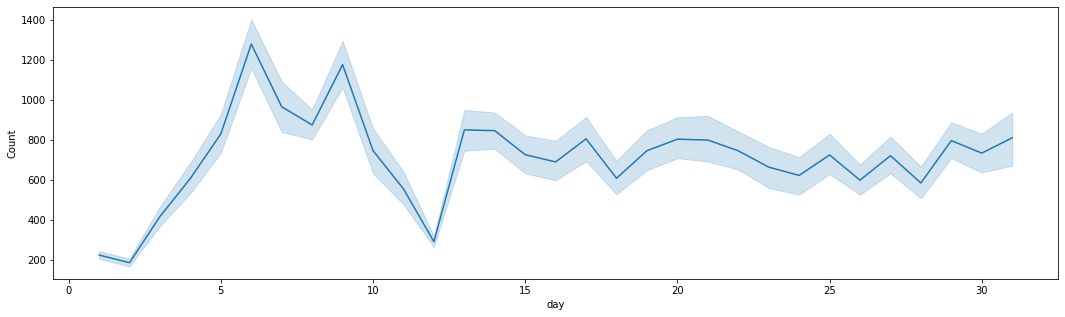

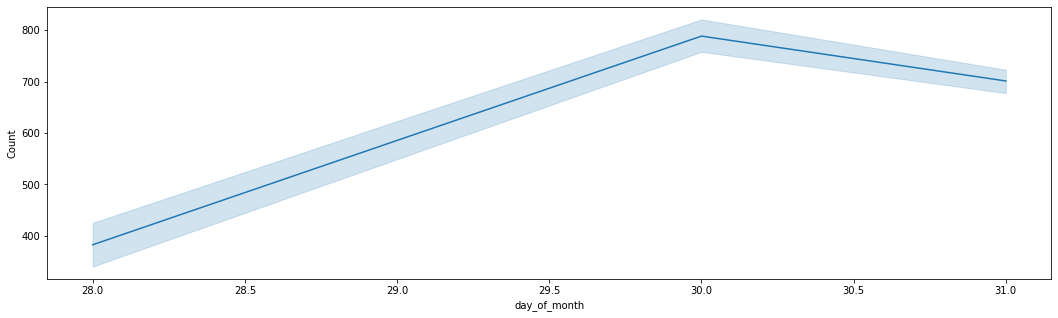

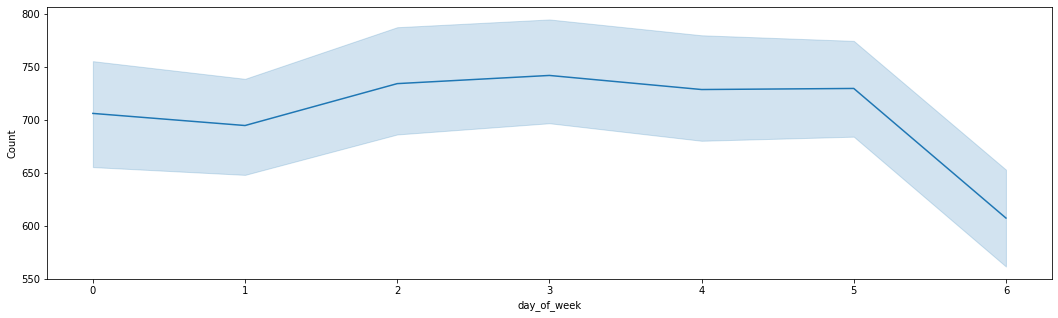

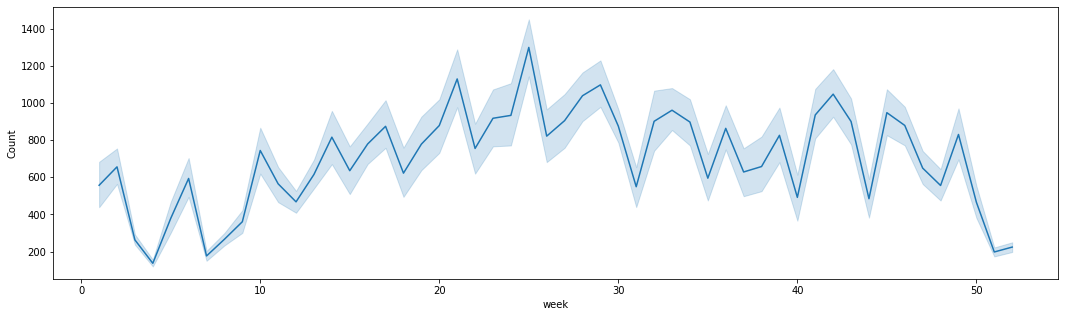

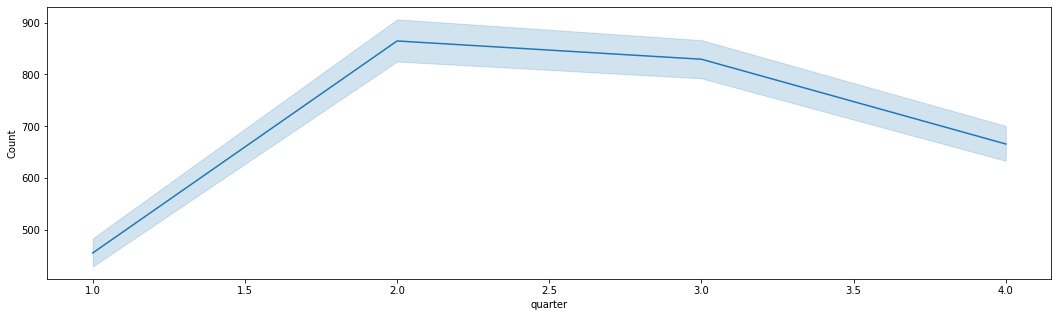

In [17]:
for col in trainplt.columns:
    plt.figure(figsize = (18,5)) 
    sns.lineplot(x = trainplt[col],y = y)
    

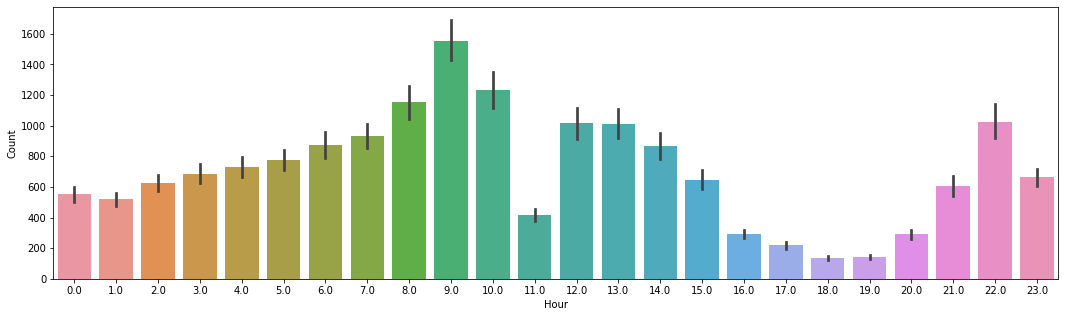

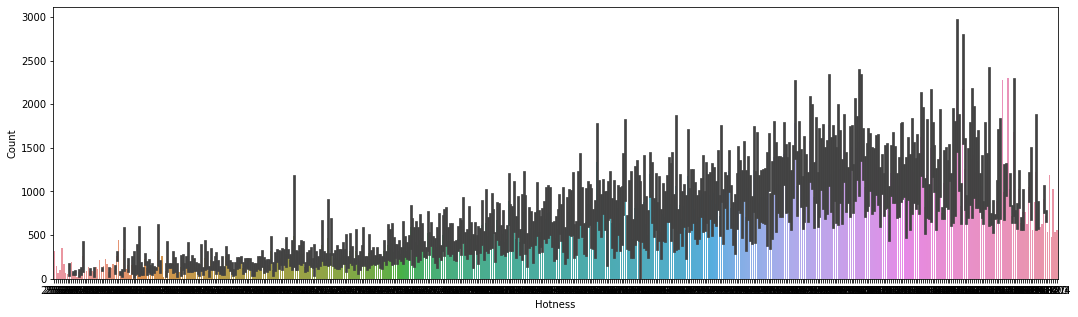

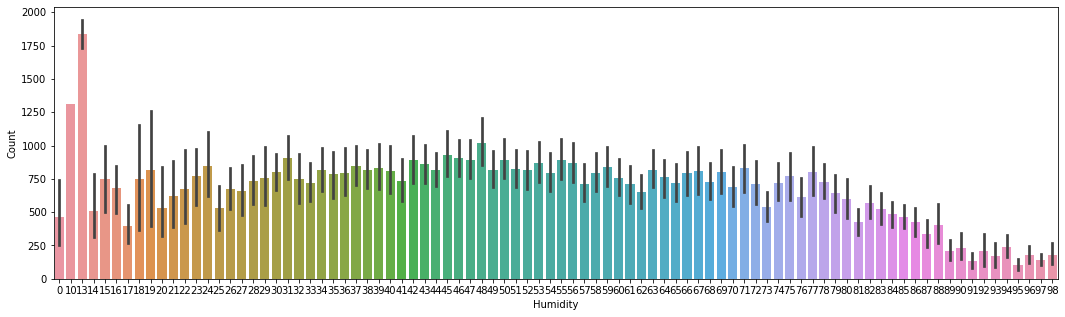

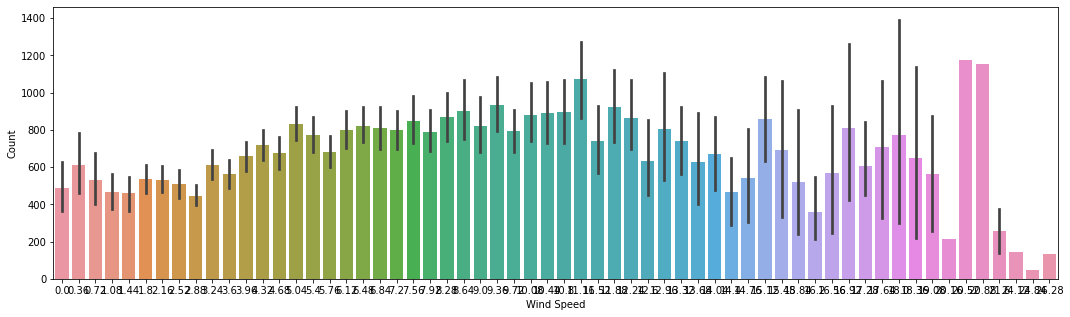

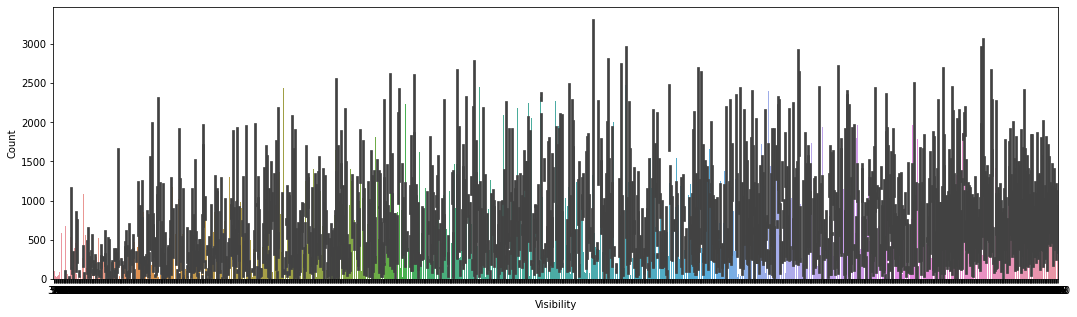

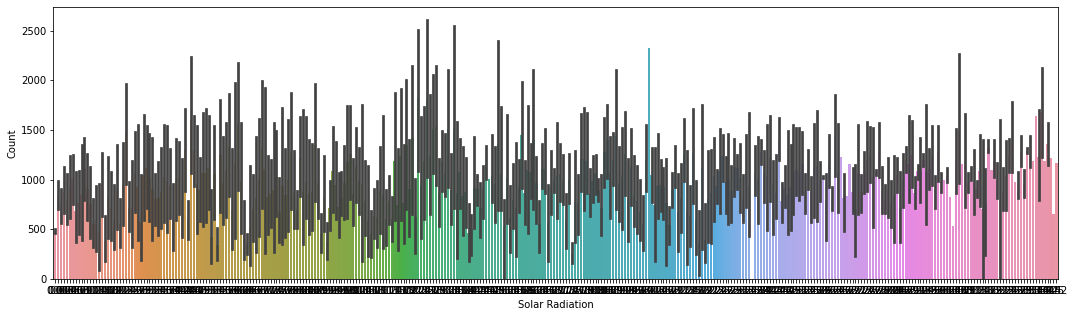

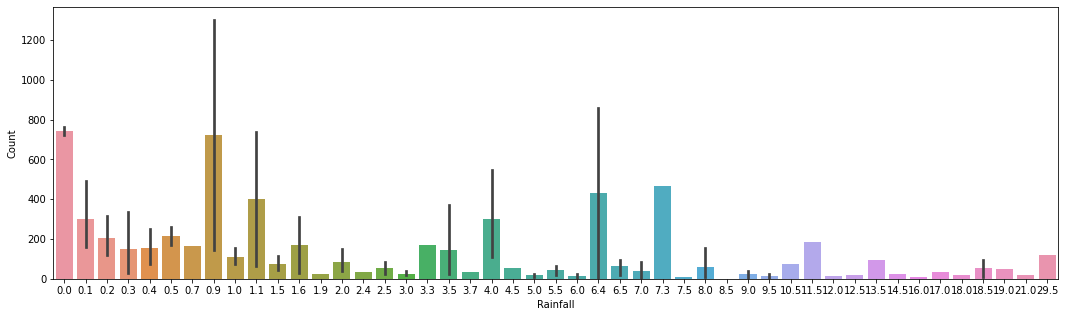

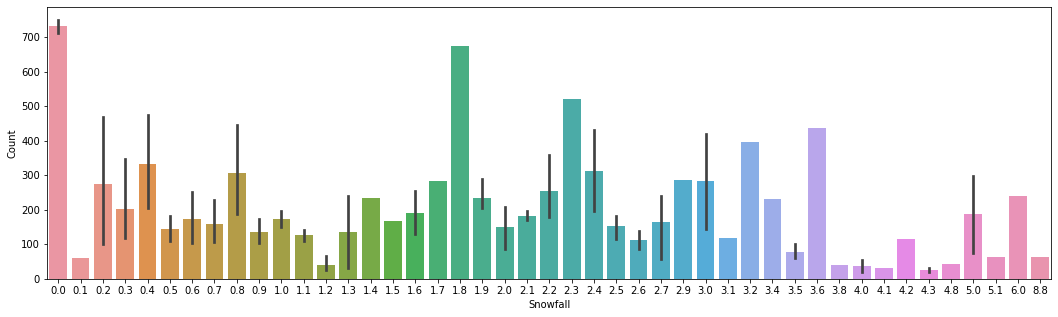

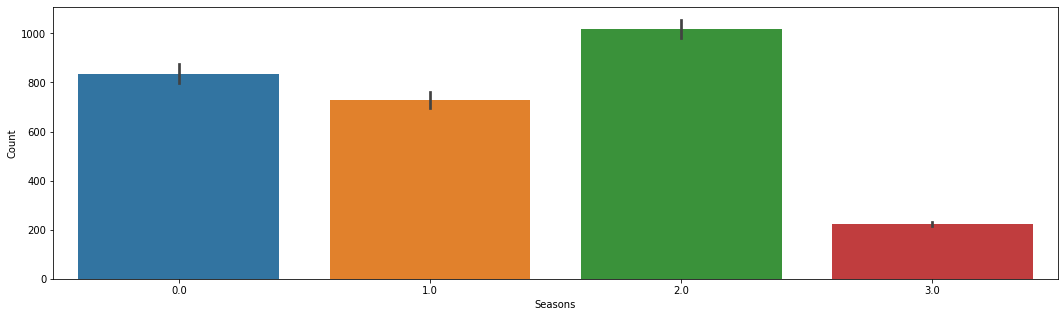

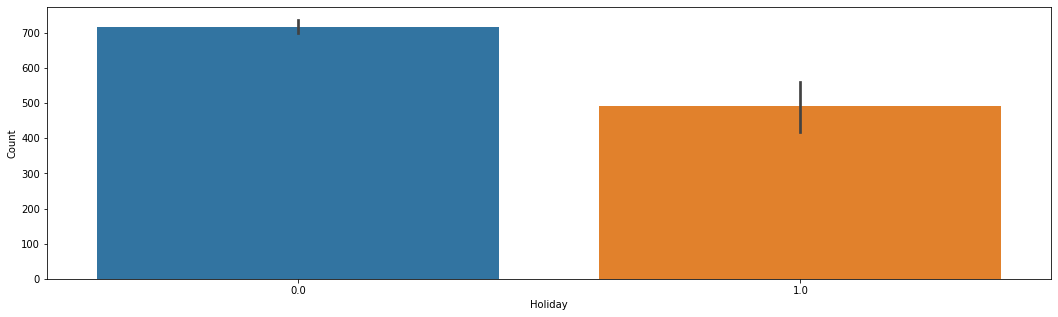

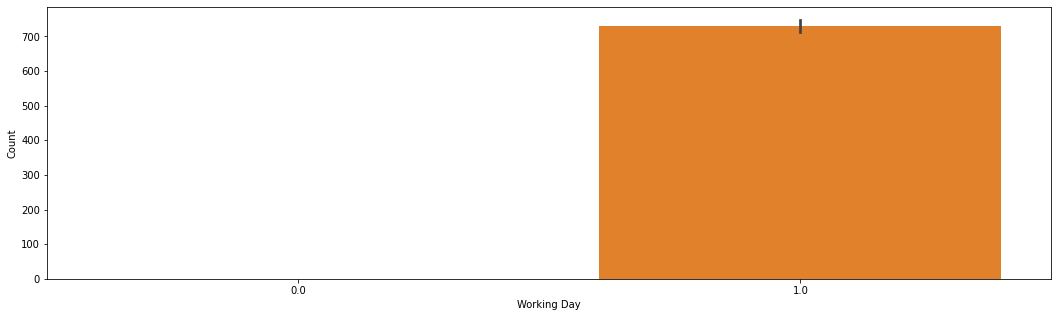

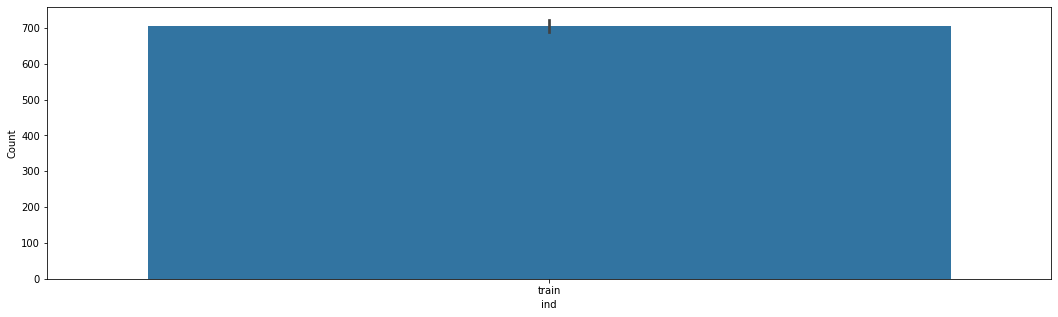

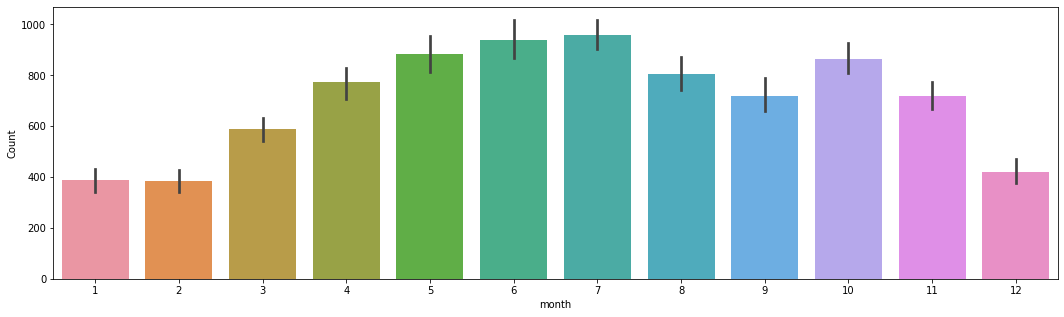

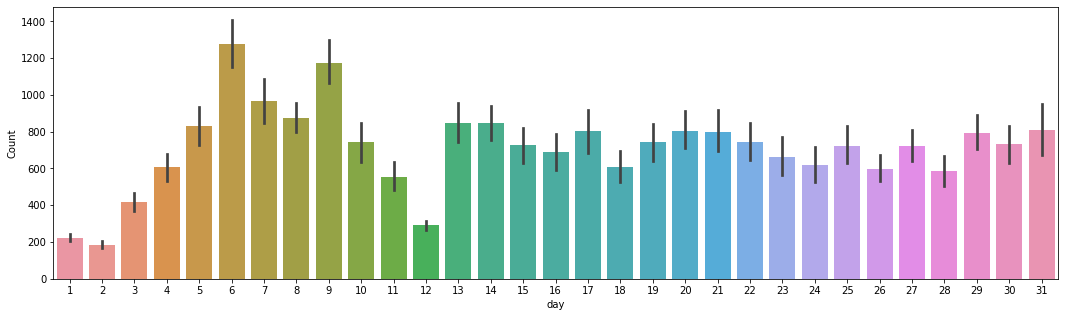

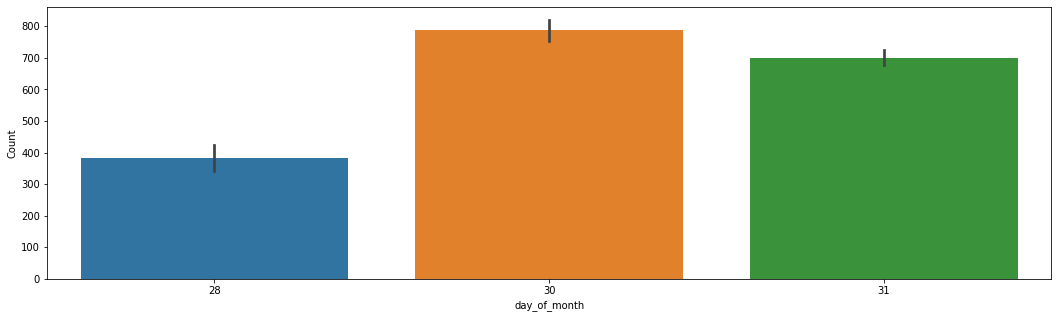

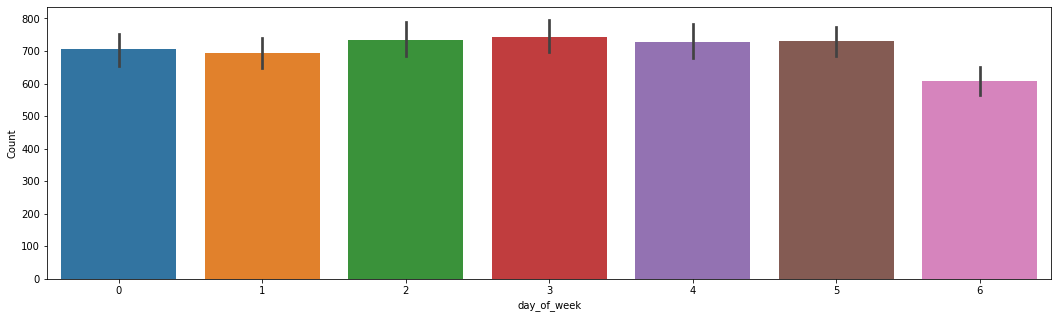

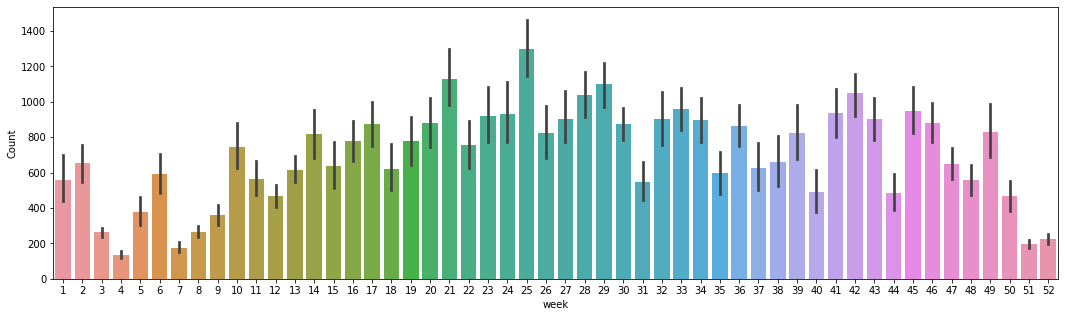

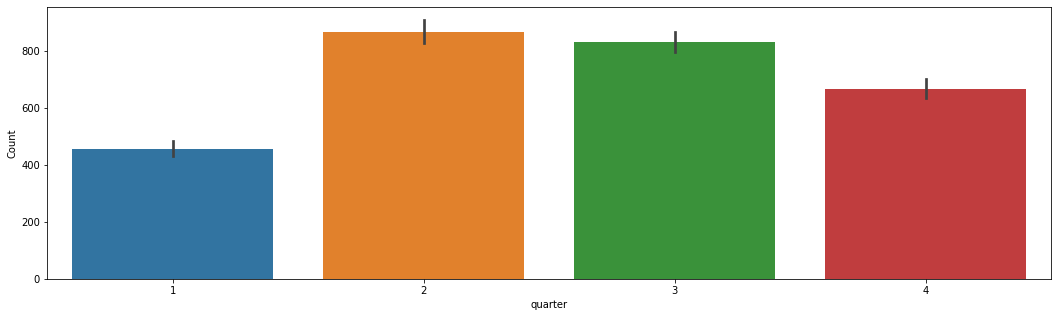

In [18]:
for col in trainplt.columns:
    plt.figure(figsize = (18,5)) 
    sns.barplot(x = trainplt[col],y = y)
    

In [19]:
label_df

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,
4987,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,10,6,31,5,40,4
4988,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,1,21,31,6,3,1
4989,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,12,13,31,2,50,4
4990,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,7,3,31,1,27,3
4991,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,7,21,31,5,29,3
4983,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,3,19,31,0,12,1
4984,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,3,10,31,5,10,1


In [23]:
label_df.isna().sum()

Hour               0
Hotness            0
Humidity           0
Wind Speed         0
Visibility         0
Solar Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Working Day        0
ind                0
month              0
day                0
day_of_month       0
day_of_week        0
week               0
quarter            0
dtype: int64

In [26]:
X_trainU,X_testU = label_df[label_df['ind'].eq('train')],label_df[label_df['ind'].eq('test')]

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_trainU.drop('ind',axis = 1)))
X_test = pd.DataFrame(scaler.transform(X_testU.drop('ind',axis = 1)))

X_train.columns = X_trainU.drop('ind',axis = 1).columns
X_test.columns = X_testU.drop('ind',axis = 1).columns

X_train

# label_df = scaler.fit_transform(label_df.drop("ind",axis = 1))
# final_df = pd.concat([label_df,df['ind']],axis = 1)
# final_df

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,month,day,day_of_month,day_of_week,week,quarter
0,1.223084,1.209950,1.215068,-0.304298,-0.581841,-0.659687,-0.137977,-0.166115,0.471076,-0.235503,0.182082,-0.440978,-0.870766,0.667716,-1.002540,-0.499561,-0.453780
1,0.500931,-1.130163,-1.288455,-1.087131,0.936522,-0.659687,-0.137977,-0.166115,1.369617,-0.235503,0.182082,-1.604628,0.623142,0.667716,1.483863,-1.566462,-1.351971
2,1.223084,-0.082603,1.215068,-1.282840,-1.834492,-0.648252,-0.137977,-0.166115,-0.427465,-0.235503,0.182082,1.304497,-1.215514,-0.523423,-1.499821,1.234152,1.342604
3,-1.087807,1.277535,0.429649,-0.597860,0.560232,0.975530,-0.137977,-0.166115,0.471076,-0.235503,0.182082,-0.440978,-0.985682,0.667716,-1.499821,-0.499561,-0.453780
4,1.078653,-1.358261,0.429649,-1.087131,-0.080121,-0.659687,-0.137977,-0.166115,1.369617,-0.235503,0.182082,-1.313715,-1.675178,-2.905700,-0.007979,-1.433099,-1.351971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,-0.221223,1.725282,-0.355770,0.869952,0.936522,0.014983,-0.137977,-0.166115,0.471076,-0.235503,0.182082,0.140847,0.623142,0.667716,0.986583,0.167252,0.444412
4982,-0.221223,-0.386734,-0.355770,1.554932,0.898563,-0.648252,-0.137977,-0.166115,-0.427465,-0.235503,0.182082,-1.022803,0.393310,0.667716,-1.499821,-0.966330,-1.351971
4983,-1.087807,0.804443,-0.895745,0.869952,0.695565,2.359176,-0.137977,-0.166115,-1.326006,4.246238,0.182082,-1.022803,-0.640934,0.667716,0.986583,-1.099693,-1.351971
4984,0.212069,-1.501878,0.036940,-0.793569,0.936522,-0.659687,-0.137977,-0.166115,1.369617,-0.235503,0.182082,0.722672,-1.675178,-0.523423,0.986583,0.567339,0.444412


In [59]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
min_delta=0.001, # minimium amount of change to count as an improvement
patience=50, # how many epochs to wait before stopping
restore_best_weights=True,
)
model = keras.Sequential([
layers.Dense(200, activation='relu', input_shape=[17]),
layers.Dense(200, activation='relu'),
layers.Dense(200, activation='relu'),
    
# layers.Dense(200, activation='sigmoid'),
layers.Dense(1),
])
model.compile(
optimizer='adam',
loss='mae',
)

In [60]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, train_size=0.8, test_size=0.2,random_state=0)

In [61]:
history = model.fit(
X_tr, y_tr,
validation_data=(X_val, y_val),
batch_size=5000,
epochs=1000,
)

Epoch 1/1000
1/1 [==============================] - 8s 8s/step - loss: 705.8747 - val_loss: 704.6873
Epoch 2/1000
1/1 [==============================] - 0s 47ms/step - loss: 705.5455 - val_loss: 704.3480
Epoch 3/1000
1/1 [==============================] - 0s 48ms/step - loss: 705.2020 - val_loss: 703.9841
Epoch 4/1000
1/1 [==============================] - 0s 49ms/step - loss: 704.8329 - val_loss: 703.5827
Epoch 5/1000
1/1 [==============================] - 0s 62ms/step - loss: 704.4256 - val_loss: 703.1335
Epoch 6/1000
1/1 [==============================] - 0s 47ms/step - loss: 703.9687 - val_loss: 702.6237
Epoch 7/1000
1/1 [==============================] - 0s 61ms/step - loss: 703.4518 - val_loss: 702.0416
Epoch 8/1000
1/1 [==============================] - 0s 46ms/step - loss: 702.8645 - val_loss: 701.3796
Epoch 9/1000
1/1 [==============================] - 0s 46ms/step - loss: 702.1915 - val_loss: 700.6243
Epoch 10/1000
1/1 [==============================] - 0s 53ms/step - loss: 7

In [62]:
pred = model.predict(X_test)
pred

array([[1301.9835  ],
       [  31.200857],
       [  70.67082 ],
       ...,
       [ 786.6327  ],
       [ 333.61172 ],
       [ 972.0334  ]], dtype=float32)

In [63]:
submit = pd.DataFrame({'id':X_test.index,'Count':pred.flatten().round()})

In [64]:
submit.to_csv('SubmissionCassandra.csv',index = False)